## Tutorial Number 2

Written by KN, Feb-2017

Based from: http://localhost:8888/notebooks/General_code/deepLearning/Kadenze_tutorial/CADL/session-2/lecture-2.ipynb

In [50]:
# Imports
%matplotlib inline
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')
from tensorflow.python.framework import ops
from scipy.misc import imresize
from skimage import data

## Make some toy data

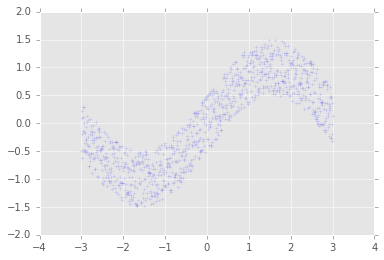

In [2]:
# Sine wave data
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

## Build regression NN

In [12]:
tf.global_variables_initializer?

Object `tf.global_variables_initializer` not found.


In [20]:
def train(xs, ys, X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))   # get average distance 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  # initialize optimizer
    plt.subplots(1, 1)
    plt.scatter(xs, ys, alpha=0.15, marker='+')  
    plt.xlim([-4, 4])
    plt.ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.initialize_all_variables())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                plt.plot(xs, ys_pred, 'k', alpha=it_i / np.float(n_iterations))
                print(training_cost)
    
    
def distance(p1, p2):
    """ Measures the absolute distance, also known as the l1-norm"""
    return tf.abs(p1 - p2)

In [22]:
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

0.538441
0.411116
0.411077
0.411078
0.411076
0.411081
0.411079
0.411075
0.411074
0.411076


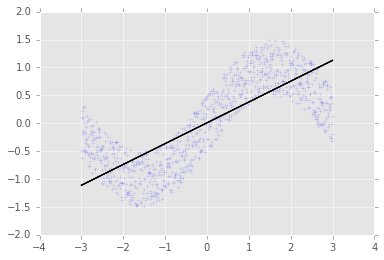

In [23]:
# To create the variables, we'll use tf.Variable
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

train(xs, ys, X, Y, Y_pred)

1.74846
2.98779
3.06996
2.71078
1.63537
3.17923
2.73413
2.40769
2.97299
2.07686


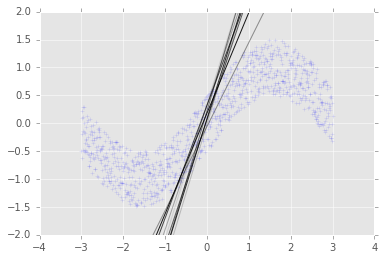

In [24]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(xs, ys, X, Y, Y_pred)

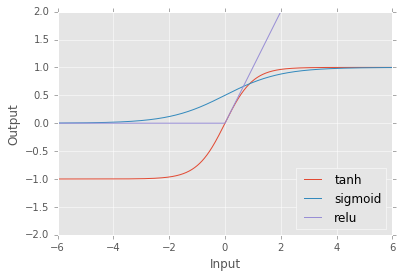

In [25]:
# Common NN nonlinearities

sess2 = tf.InteractiveSession()
x = np.linspace(-6,6,1000)

plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

In [28]:
def linearLayer(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')
    return h

0.405802
0.400317
0.38542
0.354405
0.32098
0.291749
0.275345
0.266451
0.262265
0.26036


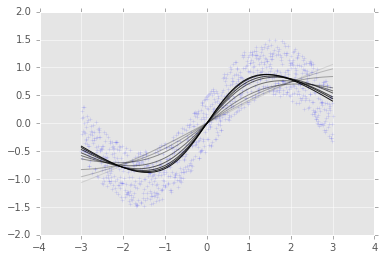

In [29]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
h = linearLayer(X, 1, n_neurons)

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(xs, ys, X, Y, Y_pred)

## Going from this is using TF effectively

In [33]:
# reset the graph
ops.reset_default_graph()

In [34]:
# Create a new network
# Define the layer
n_input = 2
n_output = 10
X = tf.placeholder(tf.float32, name='X')
h = linearLayer(X, n_input, n_output)

# To get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
print([op.name for op in g.get_operations()])

[u'X', u'random_normal/shape', u'random_normal/mean', u'random_normal/stddev', u'random_normal/RandomStandardNormal', u'random_normal/mul', u'random_normal', u'W', u'W/Assign', u'W/read', u'Const', u'b', u'b/Assign', u'b/read', u'ExpandDims/dim', u'ExpandDims', u'MatMul', u'add', u'h']


In [35]:
tf.variable_scope?

In [37]:
# Better way to construct layers: scoping?

def linearLayer2(X, n_input, n_output, activation=None, scope=None, mean_init=0.0, stddev_init = 0.1):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=mean_init, stddev=stddev_init))
        # (vs: W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W'))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        # (vs: b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b'))
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        # (vs: h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h'))
        return h

In [40]:
# so, to see this, create another new network
ops.reset_default_graph()

# Define the layer
n_input1 = 2
n_output1 = 10
X = tf.placeholder(tf.float32, name='X')
h1 = linearLayer2(X, n_input1, n_output1, scope='layer1')

# To get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in g.get_operations()]

[u'X',
 u'layer1/W',
 u'layer1/W/Initializer/random_normal/shape',
 u'layer1/W/Initializer/random_normal/mean',
 u'layer1/W/Initializer/random_normal/stddev',
 u'layer1/W/Initializer/random_normal/RandomStandardNormal',
 u'layer1/W/Initializer/random_normal/mul',
 u'layer1/W/Initializer/random_normal',
 u'layer1/W/Assign',
 u'layer1/W/read',
 u'layer1/b',
 u'layer1/b/Initializer/Const',
 u'layer1/b/Assign',
 u'layer1/b/read',
 u'layer1/MatMul',
 u'layer1/add']

In [41]:
# To add more layers...
n_input2 = 10
n_output2 = 10
h2 = linearLayer2(X, n_input2, n_output2, scope='layer2')

# Again!
n_input3 = 10
n_output3 = 3
h3 = linearLayer2(X, n_input3, n_output3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in g.get_operations()]

[u'X',
 u'layer1/W',
 u'layer1/W/Initializer/random_normal/shape',
 u'layer1/W/Initializer/random_normal/mean',
 u'layer1/W/Initializer/random_normal/stddev',
 u'layer1/W/Initializer/random_normal/RandomStandardNormal',
 u'layer1/W/Initializer/random_normal/mul',
 u'layer1/W/Initializer/random_normal',
 u'layer1/W/Assign',
 u'layer1/W/read',
 u'layer1/b',
 u'layer1/b/Initializer/Const',
 u'layer1/b/Assign',
 u'layer1/b/read',
 u'layer1/MatMul',
 u'layer1/add',
 u'layer2/W',
 u'layer2/W/Initializer/random_normal/shape',
 u'layer2/W/Initializer/random_normal/mean',
 u'layer2/W/Initializer/random_normal/stddev',
 u'layer2/W/Initializer/random_normal/RandomStandardNormal',
 u'layer2/W/Initializer/random_normal/mul',
 u'layer2/W/Initializer/random_normal',
 u'layer2/W/Assign',
 u'layer2/W/read',
 u'layer2/b',
 u'layer2/b/Initializer/Const',
 u'layer2/b/Assign',
 u'layer2/b/read',
 u'layer2/MatMul',
 u'layer2/add',
 u'layer3/W',
 u'layer3/W/Initializer/random_normal/shape',
 u'layer3/W/Initi

## "Painting" an image

i.e., learning the mapping between image location and the corresponding color

(300, 451, 3)
(64, 64, 3)


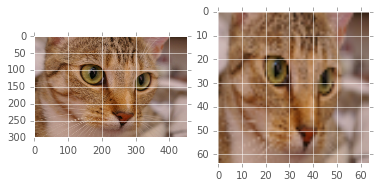

In [53]:
img1 = data.chelsea()#.astype(np.float32)
print(img1.shape)
plt.subplot(1,2,1)
plt.imshow(img1)

# downsample
imDims = 64
img1 = imresize(img1, (imDims, imDims))
plt.subplot(1,2,2)
plt.imshow(img1)
print(img1.shape)

In [54]:
# Gather training data

# To collect all the positions in the image in our list, xs
xs = []
# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img1.shape[0]):
    for col_i in range(img1.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])
# (this could probably be done faster)  
        
# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

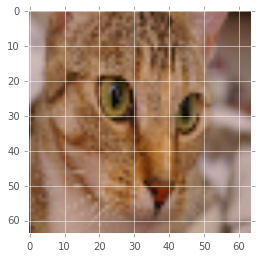

In [55]:
plt.imshow(ys.reshape(img.shape))

In [59]:
# Build the network
ops.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

# feed itself each previous layer
current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linearLayer2(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
# define Y_pred by last layer
Y_pred = current_input

# cost fxn
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

# Use Adam optimizer for CNNs (SGD is perhaps better for RNNs)
lr = 0.001  # learning rate
optimizer = tf.train.AdamOptimizer(lr).minimize(cost)

(0, 87.545677)
(1, 80.222809)
(2, 78.057831)
(3, 77.385483)
(4, 77.109734)
(5, 75.953384)
(6, 76.107033)
(7, 74.85289)
(8, 74.689934)
(9, 74.490585)
(10, 74.309654)
(11, 72.792664)
(12, 74.288986)
(13, 71.639557)
(14, 72.467278)
(15, 71.278839)
(16, 70.987045)
(17, 70.580978)
(18, 70.567978)
(19, 71.992401)


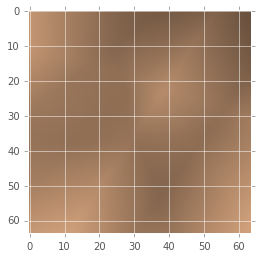

(20, 70.153839)
(21, 72.717087)
(22, 69.897186)
(23, 70.312805)
(24, 69.794823)
(25, 69.004005)
(26, 70.136536)
(27, 69.332306)
(28, 69.533844)
(29, 70.462067)
(30, 68.964218)
(31, 68.704193)
(32, 68.478264)
(33, 68.503677)
(34, 68.349258)
(35, 68.284477)
(36, 68.732422)
(37, 68.439034)
(38, 70.617447)
(39, 67.902702)


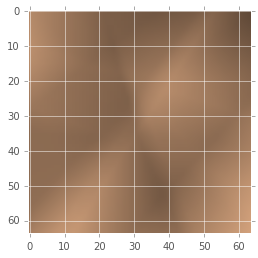

(40, 68.574356)
(41, 68.593704)
(42, 67.914276)
(43, 68.044952)
(44, 70.062424)
(45, 69.611069)
(46, 68.953232)
(47, 67.96965)
(48, 67.172729)
(49, 68.933197)
(50, 66.984169)
(51, 68.053711)
(52, 67.403625)
(53, 66.622284)
(54, 67.966133)
(55, 66.605042)
(56, 66.411713)
(57, 67.400475)
(58, 66.874474)
(59, 67.371933)


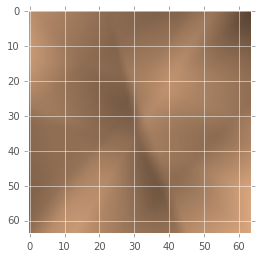

(60, 67.541626)
(61, 65.240204)
(62, 65.860939)
(63, 66.087448)
(64, 65.163887)
(65, 65.520927)
(66, 65.631714)
(67, 64.754089)
(68, 66.304314)
(69, 68.011421)
(70, 65.973747)
(71, 64.899811)
(72, 64.926758)
(73, 64.832031)
(74, 64.44796)
(75, 64.945755)
(76, 62.763)
(77, 65.902893)
(78, 62.925789)
(79, 68.117538)


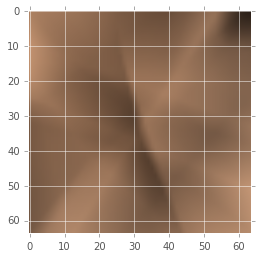

(80, 63.992516)
(81, 62.728405)
(82, 62.31414)
(83, 63.258415)
(84, 62.575851)
(85, 61.921764)
(86, 59.708179)
(87, 58.910667)
(88, 59.991005)
(89, 59.50531)
(90, 58.56459)
(91, 58.713764)
(92, 59.249161)
(93, 56.875877)
(94, 57.311165)
(95, 59.629051)
(96, 57.428368)
(97, 57.527367)
(98, 57.705925)
(99, 57.703987)


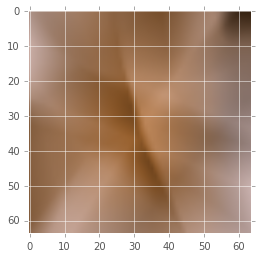

(100, 57.238056)
(101, 56.481705)
(102, 56.36525)
(103, 57.66457)
(104, 59.372108)
(105, 64.547012)
(106, 55.512825)
(107, 55.925339)
(108, 55.86652)
(109, 57.150681)
(110, 57.034725)
(111, 56.568134)
(112, 55.382862)
(113, 55.042976)
(114, 56.006271)
(115, 56.188965)
(116, 55.757656)
(117, 56.551094)
(118, 54.621769)
(119, 54.530445)


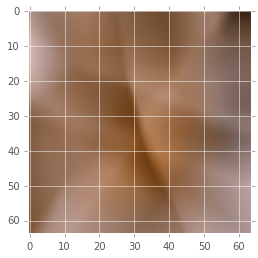

(120, 55.865089)
(121, 55.797829)
(122, 56.584068)
(123, 53.8885)
(124, 54.532719)
(125, 53.562706)
(126, 54.376556)
(127, 57.270889)
(128, 53.679554)
(129, 56.86245)
(130, 53.203304)
(131, 56.636948)
(132, 52.396034)
(133, 54.214912)
(134, 54.364376)
(135, 51.888161)
(136, 53.266106)
(137, 52.921257)
(138, 53.659298)
(139, 52.21899)


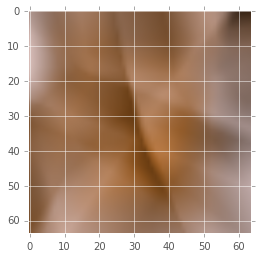

(140, 52.734501)
(141, 53.122486)
(142, 52.431259)
(143, 51.773598)
(144, 52.367943)
(145, 51.471085)
(146, 52.194126)
(147, 53.176991)
(148, 51.574455)
(149, 53.460892)
(150, 52.164639)
(151, 50.550407)
(152, 55.709106)
(153, 52.001823)
(154, 53.154846)
(155, 51.409489)
(156, 52.822235)
(157, 50.404755)
(158, 52.411625)
(159, 49.812447)


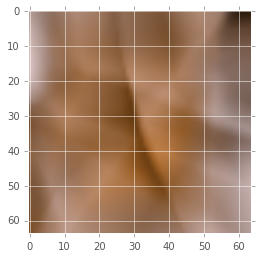

(160, 50.435539)
(161, 49.571308)
(162, 50.112587)
(163, 55.485512)
(164, 52.633492)
(165, 51.327759)
(166, 49.773369)
(167, 48.598091)
(168, 51.419495)
(169, 55.313446)
(170, 52.941917)
(171, 50.631626)
(172, 50.67157)
(173, 47.881508)
(174, 50.151558)
(175, 49.123764)
(176, 48.130886)
(177, 48.651325)
(178, 50.434425)
(179, 46.822212)


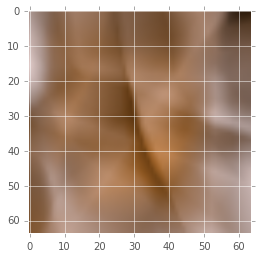

(180, 47.165623)
(181, 48.129093)
(182, 50.876205)
(183, 51.155632)
(184, 47.489567)
(185, 52.065437)
(186, 48.139572)
(187, 47.584747)
(188, 46.468147)
(189, 49.198891)
(190, 46.506672)
(191, 51.510368)
(192, 50.230728)
(193, 47.370506)
(194, 47.434231)
(195, 46.450401)
(196, 46.204277)
(197, 49.089924)
(198, 47.522121)
(199, 45.406502)


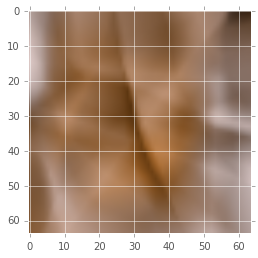

(200, 46.135956)
(201, 45.490479)
(202, 46.179096)
(203, 49.248016)
(204, 45.926582)
(205, 47.843109)
(206, 46.597519)
(207, 47.05661)
(208, 45.403744)
(209, 53.326878)
(210, 53.687744)
(211, 47.491119)
(212, 45.109077)
(213, 46.836105)
(214, 45.007462)
(215, 46.126373)
(216, 50.405132)
(217, 49.732204)
(218, 44.618217)
(219, 44.589882)


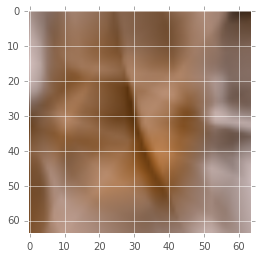

(220, 45.081242)
(221, 48.960735)
(222, 47.815567)
(223, 49.717781)
(224, 45.719498)
(225, 43.835835)
(226, 46.76593)
(227, 46.211014)
(228, 43.805634)
(229, 44.95575)
(230, 43.894653)
(231, 45.223759)
(232, 47.390076)
(233, 44.043304)
(234, 45.710255)
(235, 43.89983)
(236, 44.903221)
(237, 43.776443)
(238, 44.208801)
(239, 43.168056)


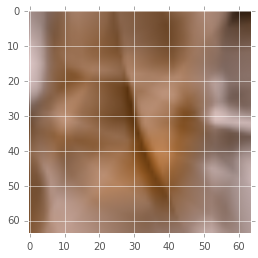

(240, 46.344604)
(241, 44.673306)
(242, 44.986389)
(243, 48.26852)
(244, 43.09111)
(245, 42.868847)
(246, 42.675362)
(247, 47.632786)
(248, 43.90958)
(249, 43.353783)
(250, 44.749695)
(251, 44.430828)
(252, 44.698727)
(253, 43.072823)
(254, 46.263435)
(255, 42.914124)
(256, 42.102341)
(257, 42.282913)
(258, 43.096138)
(259, 43.18866)


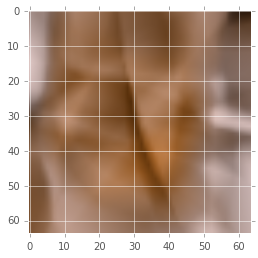

(260, 42.334698)
(261, 44.483887)
(262, 42.044464)
(263, 44.703033)
(264, 43.783188)
(265, 45.06728)
(266, 42.210758)
(267, 45.529854)
(268, 44.516624)
(269, 53.10392)
(270, 42.128246)
(271, 42.512283)
(272, 42.925083)
(273, 41.761387)
(274, 41.787319)
(275, 42.282101)
(276, 44.549377)
(277, 41.999233)
(278, 43.878784)
(279, 42.326092)


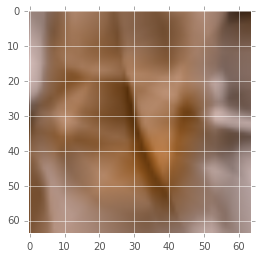

(280, 44.300026)
(281, 41.477673)
(282, 49.621521)
(283, 43.703339)
(284, 43.98555)
(285, 41.475586)
(286, 43.829933)
(287, 41.376549)
(288, 45.601955)
(289, 44.905457)
(290, 41.845825)
(291, 41.318462)
(292, 41.71944)
(293, 42.770348)
(294, 40.890377)
(295, 42.334587)
(296, 43.352898)
(297, 41.019318)
(298, 43.742622)
(299, 48.430019)


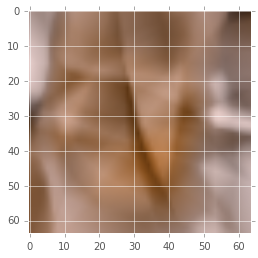

(300, 44.206974)
(301, 40.448391)
(302, 40.676521)
(303, 41.551811)
(304, 40.864471)
(305, 41.152126)
(306, 43.348885)
(307, 42.280418)
(308, 40.944664)
(309, 44.537354)
(310, 45.052269)
(311, 42.58746)
(312, 44.414284)
(313, 44.800667)
(314, 41.02253)
(315, 41.081398)
(316, 41.753235)
(317, 41.83326)
(318, 43.249077)
(319, 43.385609)


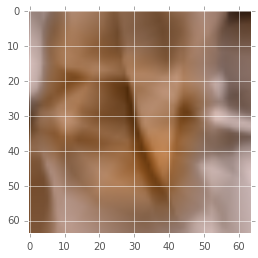

(320, 41.15884)
(321, 41.099655)
(322, 52.891891)
(323, 43.939194)
(324, 43.186604)
(325, 41.194061)
(326, 43.565224)
(327, 44.031448)
(328, 42.560638)
(329, 41.184097)
(330, 39.861694)
(331, 39.974091)
(332, 40.803135)
(333, 39.797241)
(334, 41.996056)
(335, 43.932583)
(336, 43.065723)
(337, 40.555336)
(338, 41.292931)
(339, 39.469204)


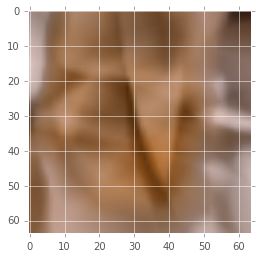

(340, 40.668434)
(341, 40.483444)
(342, 41.761292)
(343, 41.188866)
(344, 39.620205)
(345, 40.956882)
(346, 41.994507)
(347, 42.383648)
(348, 40.984692)
(349, 41.607796)
(350, 40.999638)
(351, 39.327526)
(352, 40.727772)
(353, 42.249687)
(354, 39.746887)
(355, 39.810772)
(356, 44.340446)
(357, 39.068748)
(358, 39.727028)
(359, 41.042831)


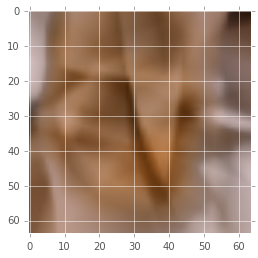

(360, 43.833122)
(361, 40.561012)
(362, 38.922142)
(363, 39.52935)
(364, 47.933758)
(365, 38.554169)
(366, 41.493988)
(367, 41.081528)
(368, 39.175522)
(369, 41.582039)
(370, 41.165112)
(371, 38.655224)
(372, 40.710205)
(373, 39.363796)
(374, 39.898026)
(375, 40.372383)
(376, 40.081703)
(377, 39.646988)
(378, 40.030426)
(379, 42.290409)


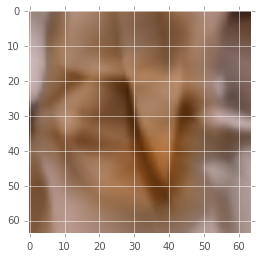

(380, 39.204666)
(381, 39.296867)
(382, 42.593369)
(383, 42.115944)
(384, 41.520435)
(385, 39.637054)
(386, 39.572769)
(387, 46.203575)
(388, 39.934872)
(389, 39.02515)
(390, 39.518677)
(391, 39.849758)
(392, 40.745533)
(393, 40.22805)
(394, 38.729385)
(395, 38.177654)
(396, 39.834854)
(397, 40.173176)
(398, 40.286537)
(399, 39.475494)


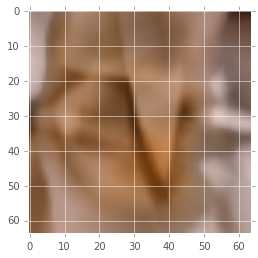

(400, 39.127792)
(401, 41.617088)
(402, 39.015251)
(403, 40.329308)
(404, 40.270226)
(405, 39.565742)
(406, 38.786423)
(407, 38.687401)
(408, 41.775204)
(409, 38.484108)
(410, 38.85461)
(411, 37.839088)
(412, 37.608723)
(413, 37.961494)
(414, 40.824234)
(415, 38.578152)
(416, 39.224205)
(417, 37.460419)
(418, 38.507519)
(419, 38.934715)


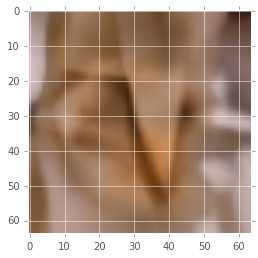

(420, 37.826324)
(421, 39.989735)
(422, 39.024292)
(423, 41.441925)
(424, 41.273529)
(425, 40.499844)
(426, 39.988026)
(427, 38.863529)
(428, 38.931221)
(429, 39.237141)
(430, 38.163635)
(431, 40.774265)
(432, 38.653015)
(433, 37.990997)
(434, 39.975506)
(435, 38.974327)
(436, 37.986046)
(437, 44.161827)
(438, 38.41391)
(439, 40.328243)


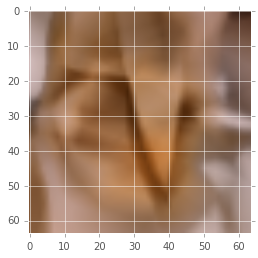

(440, 38.48233)
(441, 37.350212)
(442, 37.678177)
(443, 39.075111)
(444, 43.645805)
(445, 39.628536)
(446, 37.982529)
(447, 39.275955)
(448, 37.680328)
(449, 38.581848)
(450, 41.882385)
(451, 38.17672)
(452, 38.44286)
(453, 37.695137)
(454, 46.002186)
(455, 38.04277)
(456, 37.483421)
(457, 37.874756)
(458, 38.573872)
(459, 40.138546)


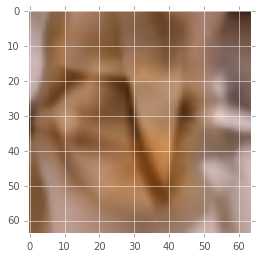

(460, 37.443302)
(461, 40.007942)
(462, 37.062668)
(463, 39.585846)
(464, 45.604889)
(465, 37.610245)
(466, 37.568836)
(467, 39.881386)
(468, 37.18174)
(469, 41.927696)
(470, 42.531258)
(471, 40.8913)
(472, 36.987877)
(473, 39.055248)
(474, 37.721786)
(475, 38.948021)
(476, 37.486767)
(477, 37.915058)
(478, 37.874172)
(479, 36.687714)


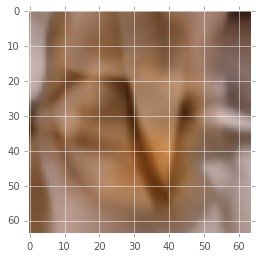

(480, 39.809822)
(481, 40.659622)
(482, 37.632034)
(483, 37.251076)
(484, 36.519989)
(485, 36.580421)
(486, 39.560604)
(487, 38.724285)
(488, 40.526775)
(489, 40.048092)
(490, 36.807278)
(491, 40.814415)
(492, 38.862602)
(493, 37.978378)
(494, 37.35318)
(495, 37.582039)
(496, 37.551189)
(497, 38.241131)
(498, 37.429665)
(499, 36.848045)


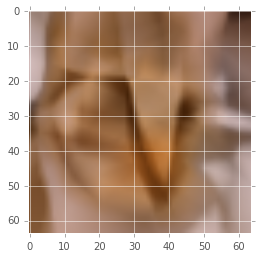

(500, 37.423241)
(501, 37.08326)
(502, 40.096397)
(503, 37.293613)
(504, 39.932152)
(505, 37.687706)
(506, 36.812912)
(507, 37.292725)
(508, 36.778969)
(509, 36.336079)
(510, 38.420494)
(511, 39.800453)
(512, 38.401348)
(513, 37.248901)
(514, 36.282158)
(515, 36.312592)
(516, 37.459633)
(517, 37.848816)
(518, 36.998539)
(519, 35.853909)


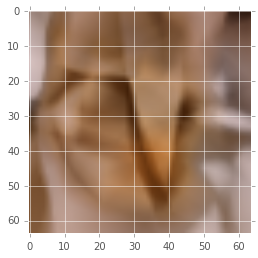

(520, 38.053051)
(521, 38.224777)
(522, 37.449493)
(523, 38.918434)
(524, 39.617607)
(525, 35.700279)
(526, 36.869827)
(527, 37.559723)
(528, 37.188709)
(529, 36.857597)
(530, 36.085999)
(531, 38.158176)
(532, 37.139236)
(533, 36.877312)
(534, 37.230804)
(535, 39.867027)
(536, 36.76392)
(537, 36.338699)
(538, 36.581024)
(539, 36.347458)


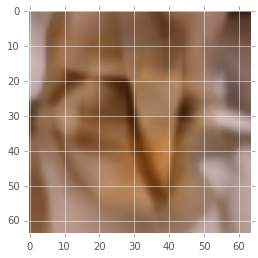

(540, 36.431274)
(541, 37.162506)
(542, 35.625137)
(543, 37.884846)
(544, 38.760162)
(545, 36.000717)
(546, 37.53141)
(547, 41.788612)
(548, 36.042625)
(549, 37.557632)
(550, 37.619576)
(551, 37.128937)
(552, 37.202675)
(553, 38.325188)
(554, 36.542545)
(555, 41.787365)
(556, 36.492931)
(557, 36.449627)
(558, 36.522564)
(559, 39.20166)


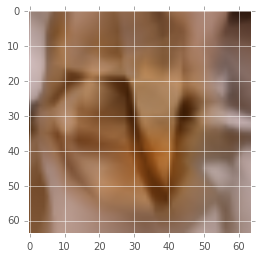

(560, 35.636612)
(561, 36.943611)
(562, 36.779724)
(563, 40.653992)
(564, 40.111935)
(565, 38.75288)
(566, 36.304474)
(567, 37.51358)
(568, 35.73584)
(569, 36.786144)
(570, 38.796021)
(571, 37.380737)
(572, 36.426559)
(573, 39.184071)
(574, 38.154064)
(575, 38.524914)
(576, 37.374184)
(577, 37.620434)
(578, 37.47805)
(579, 37.022743)


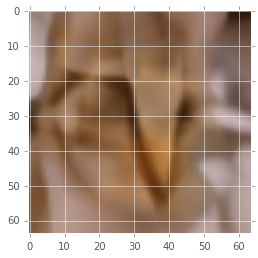

(580, 36.177391)
(581, 34.744156)
(582, 37.238922)
(583, 35.75713)
(584, 38.59034)
(585, 36.090073)
(586, 38.669506)
(587, 38.312492)
(588, 36.815437)
(589, 36.908474)
(590, 36.504719)
(591, 35.403534)
(592, 36.174255)
(593, 36.275986)
(594, 38.714294)
(595, 35.330212)
(596, 35.691635)
(597, 35.004341)
(598, 40.285355)
(599, 34.684242)


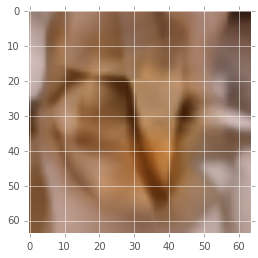

(600, 36.585754)
(601, 36.71077)
(602, 34.747993)
(603, 36.083012)
(604, 36.322407)
(605, 40.343773)
(606, 34.831318)
(607, 35.283535)
(608, 36.81842)
(609, 34.729183)
(610, 37.462433)
(611, 36.111542)
(612, 37.015049)
(613, 37.543629)
(614, 35.83873)
(615, 35.139126)
(616, 36.101074)
(617, 35.062805)
(618, 40.620937)
(619, 34.6688)


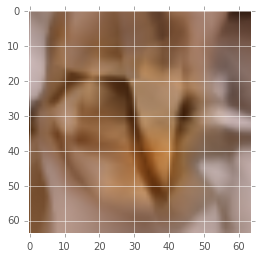

(620, 35.318317)
(621, 34.244431)
(622, 40.830322)
(623, 36.211021)
(624, 34.912556)
(625, 34.820835)
(626, 36.9189)
(627, 35.85704)
(628, 38.28265)
(629, 36.071518)
(630, 35.300468)
(631, 37.016136)
(632, 35.028557)
(633, 35.256367)
(634, 35.329422)
(635, 35.569763)
(636, 35.821556)
(637, 36.405346)
(638, 36.252949)
(639, 36.735878)


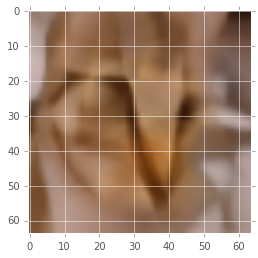

(640, 39.477001)
(641, 35.184361)
(642, 37.743423)
(643, 36.047375)
(644, 34.5215)
(645, 34.167728)
(646, 36.830246)
(647, 36.370583)
(648, 35.049843)
(649, 36.975101)
(650, 34.972855)
(651, 36.492062)
(652, 34.528385)
(653, 34.721817)
(654, 36.836205)
(655, 34.975212)
(656, 35.715897)
(657, 36.126522)
(658, 39.472923)
(659, 36.489643)


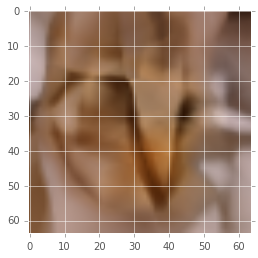

(660, 35.222923)
(661, 37.106632)
(662, 34.259735)
(663, 35.405163)
(664, 36.5396)
(665, 39.183834)
(666, 34.223927)
(667, 35.847927)
(668, 34.204796)
(669, 35.100937)
(670, 35.878551)
(671, 35.537342)
(672, 34.397472)
(673, 36.170189)
(674, 34.440788)
(675, 33.715073)
(676, 34.537468)
(677, 33.731277)
(678, 35.006981)
(679, 36.247032)


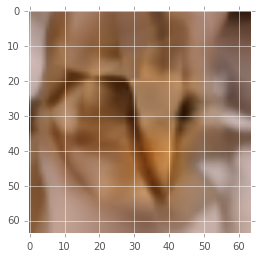

(680, 34.318462)
(681, 39.882652)
(682, 34.820366)
(683, 34.097012)
(684, 34.107681)
(685, 35.778763)
(686, 34.611046)
(687, 38.311459)
(688, 37.121193)
(689, 35.715908)
(690, 35.457081)
(691, 34.359428)
(692, 35.728539)
(693, 34.071217)
(694, 33.16877)
(695, 35.828327)
(696, 34.045021)
(697, 33.956036)
(698, 35.036648)
(699, 35.608391)


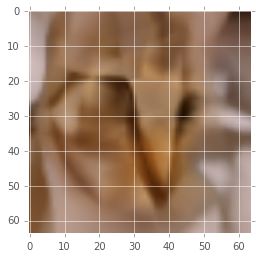

(700, 35.311459)
(701, 35.899651)
(702, 33.424858)
(703, 34.182396)
(704, 35.326767)
(705, 35.097534)
(706, 34.798023)
(707, 34.301003)
(708, 37.15065)
(709, 33.612404)
(710, 33.948204)
(711, 34.821636)
(712, 34.198021)
(713, 33.1637)
(714, 35.789856)
(715, 34.0509)
(716, 33.686264)
(717, 35.494087)
(718, 34.463428)
(719, 32.732811)


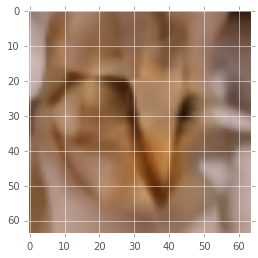

(720, 32.761963)
(721, 38.290028)
(722, 34.294594)
(723, 36.33231)
(724, 34.056698)
(725, 35.455193)
(726, 33.508987)
(727, 34.279781)
(728, 33.652046)
(729, 33.725349)
(730, 32.785927)
(731, 33.740242)
(732, 34.287361)
(733, 34.16856)
(734, 34.51038)
(735, 33.254475)
(736, 34.167637)
(737, 33.667435)
(738, 33.720406)
(739, 34.385895)


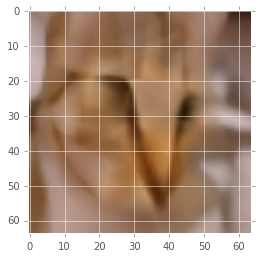

(740, 36.255592)
(741, 39.207642)
(742, 34.528343)
(743, 32.024971)
(744, 35.701721)
(745, 34.708939)
(746, 33.340851)
(747, 34.8624)
(748, 37.316635)
(749, 32.977905)
(750, 32.921059)
(751, 34.731388)
(752, 35.086868)
(753, 36.85923)
(754, 33.494316)
(755, 33.75008)
(756, 34.126869)
(757, 32.161541)
(758, 33.396442)
(759, 33.152748)


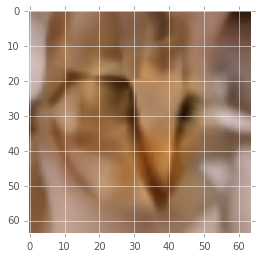

(760, 34.649498)
(761, 32.594826)
(762, 35.650749)
(763, 32.976051)
(764, 32.91098)
(765, 37.312965)
(766, 32.545586)
(767, 35.57811)
(768, 33.423809)
(769, 34.030678)
(770, 33.727715)
(771, 35.709846)
(772, 32.465382)
(773, 32.119473)
(774, 36.868431)
(775, 33.570583)
(776, 34.063744)
(777, 32.856773)
(778, 34.377136)
(779, 34.34407)


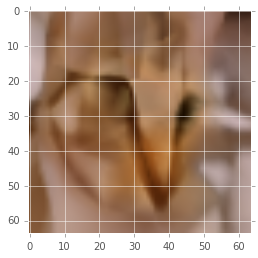

(780, 34.251045)
(781, 32.83651)
(782, 33.103607)
(783, 34.68713)
(784, 31.623304)
(785, 32.471657)
(786, 32.140259)
(787, 32.226784)
(788, 32.868286)
(789, 33.916145)
(790, 33.045658)
(791, 33.481907)
(792, 33.219643)
(793, 35.798222)
(794, 32.926872)
(795, 31.762341)
(796, 34.601757)
(797, 34.097221)
(798, 34.158371)
(799, 31.582191)


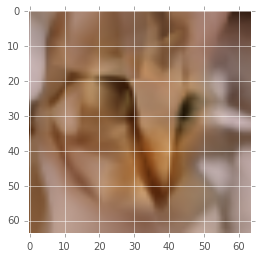

(800, 32.006413)
(801, 32.643665)
(802, 35.10775)
(803, 34.496925)
(804, 32.663551)
(805, 32.797237)
(806, 32.024525)
(807, 31.872831)
(808, 33.166588)
(809, 34.09462)
(810, 32.071747)
(811, 33.3456)
(812, 32.472244)
(813, 33.925079)
(814, 32.389969)
(815, 33.107086)
(816, 35.535591)
(817, 33.904915)
(818, 32.29496)
(819, 31.977541)


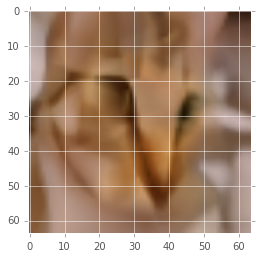

(820, 34.979214)
(821, 32.567696)
(822, 32.754704)
(823, 31.82933)
(824, 32.616184)
(825, 33.090199)
(826, 32.061462)
(827, 32.839661)
(828, 32.513966)
(829, 33.02253)
(830, 33.273354)
(831, 33.18642)
(832, 33.068329)
(833, 32.069576)
(834, 31.862146)
(835, 32.383564)
(836, 32.375484)
(837, 32.393753)
(838, 33.110519)
(839, 33.874535)


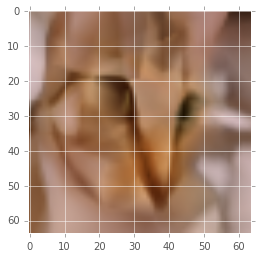

(840, 33.933792)
(841, 32.434883)
(842, 31.52788)
(843, 32.79258)
(844, 34.780231)
(845, 32.937065)
(846, 33.233681)
(847, 31.968983)
(848, 31.433346)
(849, 32.408783)
(850, 31.210173)
(851, 33.804642)
(852, 31.303268)
(853, 31.436916)
(854, 32.358276)
(855, 31.506142)
(856, 33.254028)
(857, 31.306284)
(858, 33.333191)
(859, 32.955967)


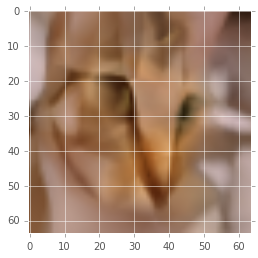

(860, 32.626995)
(861, 34.418102)
(862, 31.334221)
(863, 31.003172)
(864, 31.884483)
(865, 32.325203)
(866, 30.249836)
(867, 33.973473)
(868, 33.302456)
(869, 32.725182)
(870, 32.603447)
(871, 32.186668)
(872, 31.957884)
(873, 32.240017)
(874, 33.630363)
(875, 32.973984)
(876, 31.317636)
(877, 35.841492)
(878, 30.775482)
(879, 31.774326)


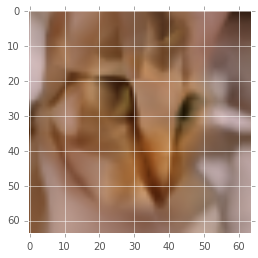

(880, 31.824577)
(881, 34.268082)
(882, 32.325031)
(883, 35.764858)
(884, 34.629837)
(885, 30.898232)
(886, 33.473019)
(887, 33.78009)
(888, 32.939915)
(889, 32.57251)
(890, 32.521797)
(891, 31.885113)
(892, 31.570393)
(893, 31.028156)
(894, 31.629869)
(895, 31.471886)
(896, 34.782433)
(897, 31.246059)
(898, 32.052364)
(899, 35.402557)


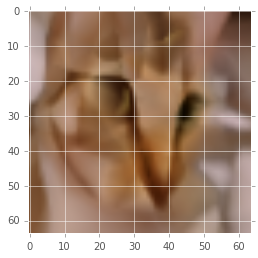

(900, 32.720634)
(901, 31.96739)
(902, 32.333965)
(903, 31.813114)
(904, 31.411036)
(905, 34.437366)
(906, 32.114288)
(907, 32.992184)
(908, 32.043064)
(909, 31.689342)
(910, 33.403599)
(911, 34.997692)
(912, 33.146461)
(913, 31.303455)
(914, 33.290089)
(915, 29.995573)
(916, 32.34906)
(917, 31.995235)
(918, 30.761951)
(919, 32.547279)


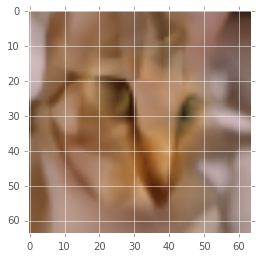

(920, 33.580055)
(921, 34.007359)
(922, 34.081795)
(923, 31.327011)
(924, 32.61726)
(925, 37.183578)
(926, 30.86384)
(927, 30.536282)
(928, 32.061279)
(929, 30.661016)
(930, 31.152578)
(931, 30.017855)
(932, 31.611576)
(933, 31.060196)
(934, 31.720701)
(935, 31.08707)
(936, 33.347221)
(937, 33.314186)
(938, 31.302223)
(939, 32.50172)


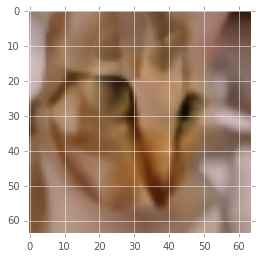

(940, 30.594301)
(941, 31.285496)
(942, 31.656528)
(943, 32.381721)
(944, 32.14719)
(945, 31.36227)
(946, 30.850945)
(947, 33.602764)
(948, 31.551125)
(949, 33.640724)
(950, 32.418987)
(951, 33.374931)
(952, 31.023251)
(953, 30.896229)
(954, 31.825718)
(955, 33.275558)
(956, 30.891411)
(957, 33.92672)
(958, 32.315254)
(959, 30.357529)


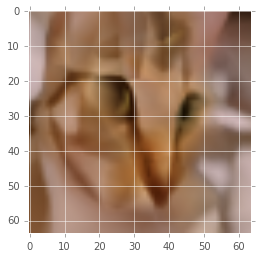

(960, 30.275925)
(961, 30.723812)
(962, 31.027716)
(963, 32.195126)
(964, 31.283646)
(965, 30.779928)
(966, 31.554792)
(967, 31.01926)
(968, 30.656389)
(969, 32.010841)
(970, 31.768957)
(971, 30.413073)
(972, 35.31683)
(973, 31.336077)
(974, 31.148697)
(975, 31.574602)
(976, 32.685516)
(977, 31.451382)
(978, 32.074722)
(979, 31.651611)


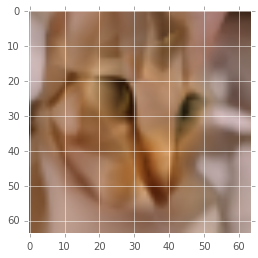

(980, 30.180973)
(981, 30.071671)
(982, 32.417431)
(983, 31.896307)
(984, 31.818068)
(985, 29.721796)
(986, 31.643934)
(987, 30.740175)
(988, 30.391073)
(989, 30.671906)
(990, 29.98048)
(991, 29.153502)
(992, 31.023273)
(993, 29.96806)
(994, 30.029236)
(995, 31.744497)
(996, 29.283867)
(997, 29.883244)
(998, 30.905918)
(999, 31.706003)


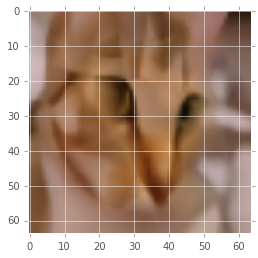

(1000, 30.846739)
(1001, 30.876335)
(1002, 30.60257)
(1003, 33.03653)
(1004, 35.339497)
(1005, 30.792133)
(1006, 31.898289)
(1007, 31.981266)
(1008, 30.803902)
(1009, 29.477079)
(1010, 30.218279)
(1011, 31.071228)
(1012, 30.289909)
(1013, 30.325993)
(1014, 31.381824)
(1015, 30.288902)
(1016, 30.20372)
(1017, 30.333174)
(1018, 30.029118)
(1019, 29.657276)


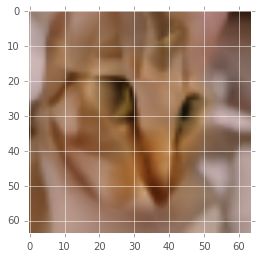

(1020, 31.60602)
(1021, 32.675232)
(1022, 29.676571)
(1023, 32.886429)
(1024, 30.399326)
(1025, 30.826176)
(1026, 30.52376)
(1027, 32.901878)
(1028, 30.797462)
(1029, 30.766768)
(1030, 30.33584)
(1031, 31.494467)
(1032, 30.97698)
(1033, 30.246632)
(1034, 32.659798)
(1035, 33.395775)
(1036, 30.392136)
(1037, 30.387112)
(1038, 30.49947)
(1039, 29.539684)


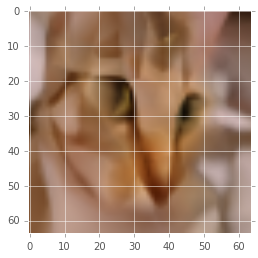

(1040, 33.454727)
(1041, 30.337742)
(1042, 29.851297)
(1043, 29.967884)
(1044, 29.844406)
(1045, 32.307953)
(1046, 29.858921)
(1047, 30.819782)
(1048, 30.295521)
(1049, 28.844471)
(1050, 29.772396)
(1051, 29.845158)
(1052, 30.332687)
(1053, 30.643272)
(1054, 29.932537)
(1055, 31.391863)
(1056, 29.002068)
(1057, 29.746)
(1058, 28.897657)
(1059, 29.96347)


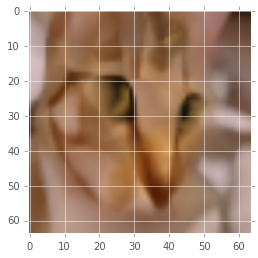

(1060, 31.074795)
(1061, 29.555725)
(1062, 30.853085)
(1063, 28.467827)
(1064, 29.667505)
(1065, 29.694016)
(1066, 32.372314)
(1067, 28.869774)
(1068, 29.894461)
(1069, 33.855961)
(1070, 30.193699)
(1071, 29.129963)
(1072, 28.511473)
(1073, 33.114662)
(1074, 29.541609)
(1075, 30.783939)
(1076, 28.732735)
(1077, 31.774803)
(1078, 29.569597)
(1079, 29.769211)


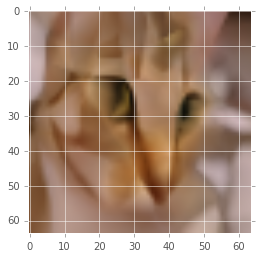

(1080, 29.894657)
(1081, 32.668137)
(1082, 29.926964)
(1083, 31.884022)
(1084, 29.312136)
(1085, 30.364643)
(1086, 28.031401)
(1087, 30.591789)
(1088, 30.283895)
(1089, 32.60582)
(1090, 28.97765)
(1091, 28.962141)
(1092, 30.794931)
(1093, 28.128677)
(1094, 29.474049)
(1095, 30.250343)
(1096, 30.236914)
(1097, 31.972466)
(1098, 28.506929)
(1099, 29.33774)


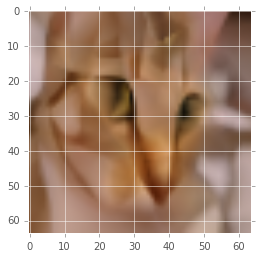

(1100, 29.419434)
(1101, 29.317698)
(1102, 29.236458)
(1103, 30.473442)
(1104, 32.347813)
(1105, 31.178806)
(1106, 29.622187)
(1107, 31.875065)
(1108, 28.766367)
(1109, 33.247711)
(1110, 29.051823)
(1111, 31.816925)
(1112, 29.08194)
(1113, 30.205479)
(1114, 29.426632)
(1115, 28.437883)
(1116, 29.073353)
(1117, 28.804787)
(1118, 31.294773)
(1119, 29.890577)


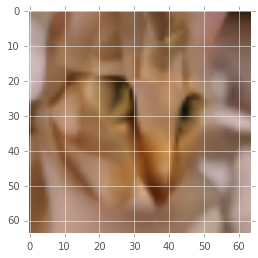

(1120, 30.881117)
(1121, 29.935696)
(1122, 28.868635)
(1123, 30.280132)
(1124, 29.79348)
(1125, 30.48159)
(1126, 29.670929)
(1127, 28.838552)
(1128, 29.360342)
(1129, 30.021683)
(1130, 28.916256)
(1131, 29.190365)
(1132, 29.692635)
(1133, 29.365067)
(1134, 29.719727)
(1135, 28.249435)
(1136, 29.838163)
(1137, 28.551043)
(1138, 29.269798)
(1139, 28.448406)


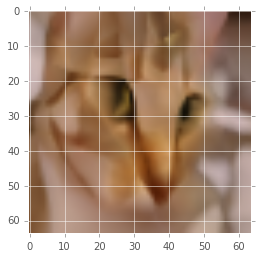

(1140, 28.695343)
(1141, 31.19767)
(1142, 29.369022)
(1143, 30.099663)
(1144, 28.803009)
(1145, 30.767241)
(1146, 29.4772)
(1147, 28.144501)
(1148, 29.280432)
(1149, 27.683893)
(1150, 29.695299)
(1151, 29.09816)
(1152, 27.547501)
(1153, 31.399748)
(1154, 28.691126)
(1155, 28.916584)
(1156, 32.186455)
(1157, 29.827187)
(1158, 28.47698)
(1159, 29.351034)


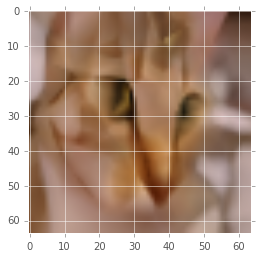

(1160, 27.039654)
(1161, 29.60442)
(1162, 29.524593)
(1163, 30.033882)
(1164, 29.111191)
(1165, 27.489525)
(1166, 28.802492)
(1167, 31.466782)
(1168, 28.715488)
(1169, 28.505037)
(1170, 29.136158)
(1171, 29.390425)
(1172, 30.828396)
(1173, 27.787876)
(1174, 29.692234)
(1175, 29.402201)
(1176, 27.456276)
(1177, 28.920145)
(1178, 28.897242)
(1179, 28.12096)


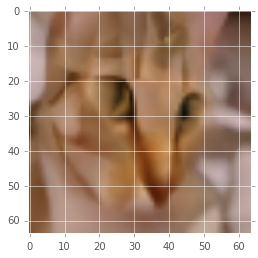

(1180, 28.926325)
(1181, 29.640472)
(1182, 29.453037)
(1183, 28.526443)
(1184, 29.06929)
(1185, 27.780005)
(1186, 28.332142)
(1187, 27.684708)
(1188, 27.658092)
(1189, 29.506969)
(1190, 28.523457)
(1191, 28.317497)
(1192, 28.625732)
(1193, 28.10141)
(1194, 30.663239)
(1195, 29.475868)
(1196, 32.218117)
(1197, 29.485363)
(1198, 27.592068)
(1199, 29.262127)


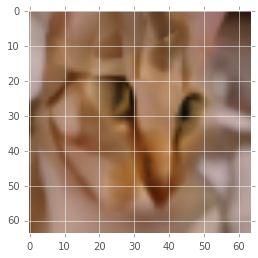

(1200, 29.42654)
(1201, 28.850067)
(1202, 29.619129)
(1203, 27.910854)
(1204, 30.49507)
(1205, 27.16584)
(1206, 28.971485)
(1207, 28.33774)
(1208, 29.610886)
(1209, 28.193573)
(1210, 28.861923)
(1211, 28.898008)
(1212, 29.423281)
(1213, 28.008408)
(1214, 27.898674)
(1215, 29.351576)
(1216, 28.126793)
(1217, 27.609585)
(1218, 28.970486)
(1219, 30.713545)


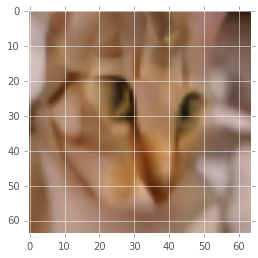

(1220, 28.136887)
(1221, 28.972652)
(1222, 28.288473)
(1223, 28.072464)
(1224, 28.878891)
(1225, 29.090492)
(1226, 27.447458)
(1227, 29.77824)
(1228, 28.652311)
(1229, 29.200741)
(1230, 30.328453)
(1231, 28.31185)
(1232, 28.281843)
(1233, 28.049791)
(1234, 28.833071)
(1235, 27.793259)
(1236, 31.963301)
(1237, 29.238297)
(1238, 28.629929)
(1239, 29.535778)


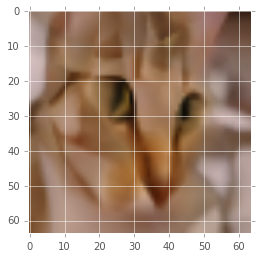

(1240, 29.791599)
(1241, 27.965816)
(1242, 28.27796)
(1243, 32.016766)
(1244, 27.57933)
(1245, 26.835213)
(1246, 27.612486)
(1247, 27.377769)
(1248, 29.13287)
(1249, 27.40086)
(1250, 28.013203)
(1251, 27.925026)
(1252, 27.884798)
(1253, 28.769428)
(1254, 28.950859)
(1255, 29.010946)
(1256, 28.15527)
(1257, 28.889717)
(1258, 29.388161)
(1259, 27.871185)


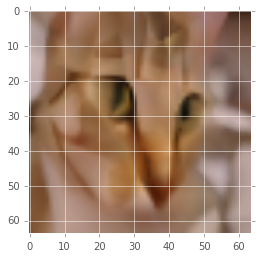

(1260, 28.956575)
(1261, 26.944099)
(1262, 28.8078)
(1263, 29.339235)
(1264, 27.402006)
(1265, 27.31052)
(1266, 27.695799)
(1267, 28.28352)
(1268, 27.905857)
(1269, 29.739628)
(1270, 29.815754)
(1271, 28.520384)
(1272, 28.874954)
(1273, 27.88517)
(1274, 26.593502)
(1275, 27.214016)
(1276, 28.248714)
(1277, 27.141857)
(1278, 27.048035)
(1279, 27.893711)


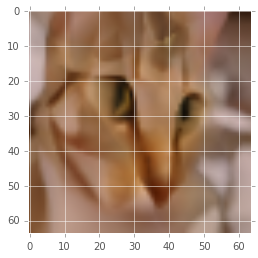

(1280, 28.001274)
(1281, 27.632906)
(1282, 27.22695)
(1283, 27.780876)
(1284, 28.28046)
(1285, 29.600002)
(1286, 27.609972)
(1287, 27.76963)
(1288, 29.144741)
(1289, 28.346708)
(1290, 29.010111)
(1291, 27.590759)
(1292, 27.096159)
(1293, 27.295933)
(1294, 26.931957)
(1295, 28.344843)
(1296, 26.91188)
(1297, 29.645485)
(1298, 27.777315)
(1299, 28.316311)


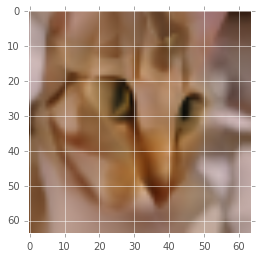

(1300, 28.19359)
(1301, 27.114046)
(1302, 27.788467)
(1303, 27.365795)
(1304, 28.314886)
(1305, 27.98782)
(1306, 27.649376)
(1307, 27.649576)
(1308, 27.202885)
(1309, 27.943733)
(1310, 28.784595)
(1311, 28.270639)
(1312, 29.110918)
(1313, 27.452694)
(1314, 31.296196)
(1315, 27.206865)
(1316, 27.214066)
(1317, 27.658201)
(1318, 26.65929)
(1319, 27.668823)


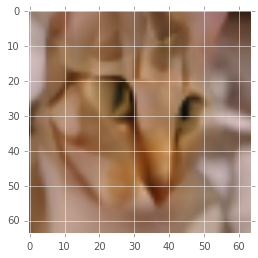

(1320, 27.097301)
(1321, 28.684242)
(1322, 27.40522)
(1323, 26.405132)
(1324, 27.842121)
(1325, 28.474615)
(1326, 26.318832)
(1327, 32.048172)
(1328, 27.910622)
(1329, 27.82761)
(1330, 26.910755)
(1331, 26.762722)
(1332, 27.959463)
(1333, 27.466812)
(1334, 27.453005)
(1335, 26.445362)
(1336, 26.192684)
(1337, 28.232517)
(1338, 28.268635)
(1339, 28.890701)


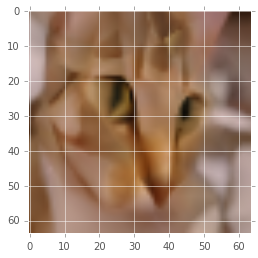

(1340, 26.25556)
(1341, 27.039822)
(1342, 27.262892)
(1343, 28.463295)
(1344, 27.985825)
(1345, 27.930634)
(1346, 26.453638)
(1347, 28.164257)
(1348, 26.546612)
(1349, 28.060629)
(1350, 27.388487)
(1351, 29.042498)
(1352, 26.686016)
(1353, 26.876415)
(1354, 27.429735)
(1355, 28.909388)
(1356, 27.660343)
(1357, 27.046917)
(1358, 27.239813)
(1359, 26.857044)


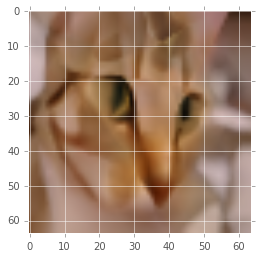

(1360, 28.559261)
(1361, 27.434641)
(1362, 27.706409)
(1363, 29.547764)
(1364, 26.254707)
(1365, 26.719337)
(1366, 26.269697)
(1367, 27.764652)
(1368, 28.560778)
(1369, 27.437481)
(1370, 27.856373)
(1371, 27.772385)
(1372, 27.587086)
(1373, 27.41539)
(1374, 27.991295)
(1375, 26.988968)
(1376, 26.497021)
(1377, 27.450531)
(1378, 27.184021)
(1379, 29.594856)


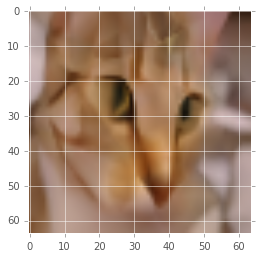

(1380, 27.35722)
(1381, 26.786604)
(1382, 27.827473)
(1383, 26.469139)
(1384, 28.230169)
(1385, 28.335295)
(1386, 26.386957)
(1387, 26.174713)
(1388, 27.503227)
(1389, 27.009363)
(1390, 26.566681)
(1391, 26.949511)
(1392, 28.824196)
(1393, 27.199062)
(1394, 27.473392)
(1395, 26.63361)
(1396, 26.882629)
(1397, 26.703985)
(1398, 29.357719)
(1399, 27.210323)


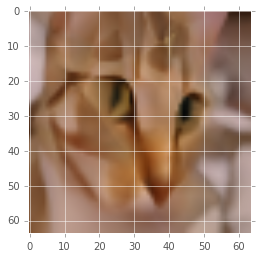

(1400, 27.224964)
(1401, 27.007492)
(1402, 27.328533)
(1403, 27.41407)
(1404, 26.547302)
(1405, 26.610596)
(1406, 26.60532)
(1407, 27.458822)
(1408, 26.48209)
(1409, 26.975933)
(1410, 26.632263)
(1411, 27.360308)
(1412, 27.19891)
(1413, 25.737682)
(1414, 26.792006)
(1415, 28.071144)
(1416, 26.83745)
(1417, 28.641954)
(1418, 26.196341)
(1419, 29.232304)


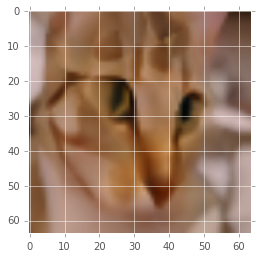

(1420, 26.984766)
(1421, 26.874472)
(1422, 26.185196)
(1423, 26.56646)
(1424, 26.566687)
(1425, 28.074741)
(1426, 26.937897)
(1427, 26.347418)
(1428, 26.580004)
(1429, 27.405674)
(1430, 26.664251)
(1431, 26.623955)
(1432, 26.719898)
(1433, 25.983137)
(1434, 25.970383)
(1435, 27.680243)
(1436, 26.591015)
(1437, 28.044033)
(1438, 26.944584)
(1439, 27.805344)


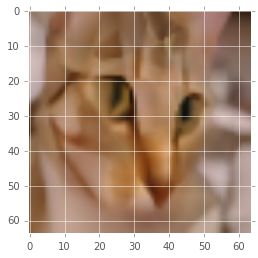

(1440, 26.169205)
(1441, 27.383511)
(1442, 26.366968)
(1443, 27.03978)
(1444, 25.640821)
(1445, 26.629185)
(1446, 27.55324)
(1447, 25.805761)
(1448, 28.130947)
(1449, 26.388721)
(1450, 26.598389)
(1451, 27.000229)
(1452, 28.078716)
(1453, 26.781406)
(1454, 27.081301)
(1455, 26.402657)
(1456, 26.890364)
(1457, 27.041605)
(1458, 28.155777)
(1459, 25.929554)


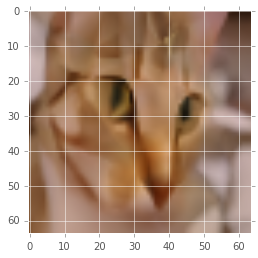

(1460, 27.427408)
(1461, 26.226492)
(1462, 26.932152)
(1463, 27.595591)
(1464, 25.83618)
(1465, 25.485882)
(1466, 26.36042)
(1467, 25.74206)
(1468, 27.896036)
(1469, 25.554098)
(1470, 27.087231)
(1471, 25.275326)
(1472, 25.943157)
(1473, 26.12084)
(1474, 27.414671)
(1475, 26.012133)
(1476, 26.512241)
(1477, 26.594925)
(1478, 25.8603)
(1479, 26.934559)


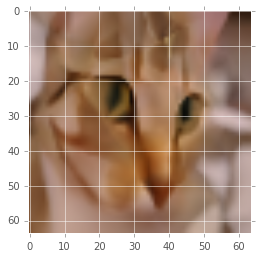

(1480, 26.598032)
(1481, 27.904322)
(1482, 25.813822)
(1483, 26.275873)
(1484, 27.253611)
(1485, 25.843609)
(1486, 26.902008)
(1487, 27.731735)
(1488, 26.587742)
(1489, 26.316404)
(1490, 26.329121)
(1491, 27.94429)
(1492, 25.83773)
(1493, 26.716192)
(1494, 27.234728)
(1495, 27.123899)
(1496, 25.664097)
(1497, 25.186178)
(1498, 25.905945)
(1499, 26.11779)


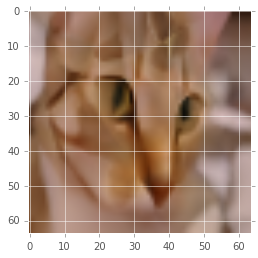

In [61]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img1.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()